In [ ]:
#Try LR 50%/20%/30% without cross-validation

In [14]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def preprocess_data(file_path, end_date=None):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    if end_date:
        data = data[data['Date'] <= pd.to_datetime(end_date)]
    data['Prev Close'] = data['Close'].shift(1)
    data['Price Change'] = (data['Close'] - data['Prev Close']) / data['Prev Close']
    data['Label'] = (data['Price Change'] > 0).astype(int)
    data.dropna(inplace=True)
    return data

directory_path = './new_data/tech'

model = LogisticRegression()
scaler = StandardScaler()
test_accs = []
cv_accs = []

for file in os.listdir(directory_path):
    if file.endswith('.csv'):
        file_path = os.path.join(directory_path, file)
        data = preprocess_data(file_path, end_date='2017-12-31')
        X = data.drop(['Date', 'Label'], axis=1)
        y = data['Label']

        X_train, temp, y_train, temp_y = train_test_split(X, y, train_size=0.5, random_state=42, shuffle=False)
        X_valid, X_test, y_valid, y_test = train_test_split(temp, temp_y, test_size=0.6, random_state=42, shuffle=False)

        X_train_scaled = scaler.fit_transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)

        y_valid_pred = model.predict(X_valid_scaled)
        valid_acc = accuracy_score(y_valid, y_valid_pred)
        cv_accs.append(valid_acc)

        y_pred = model.predict(X_test_scaled)
        test_acc = accuracy_score(y_test, y_pred)
        test_accs.append(test_acc)

avg_cv_acc = np.mean(cv_accs)
avg_test_acc = np.mean(test_accs)
print(f"Average Cross-Validation Accuracy: {avg_cv_acc:.4f}")
print(f"Average Test Accuracy: {avg_test_acc:.4f}")

Average Cross-Validation Accuracy: 0.9731
Average Test Accuracy: 0.9097


In [ ]:
# Logistic Regression 70%/30% with 3-fold cross-validation (tech)

Average Cross-Validation Accuracy: 0.9925
Average Test Accuracy: 0.9938
The accuracy of the predicted trend is: 0.5256


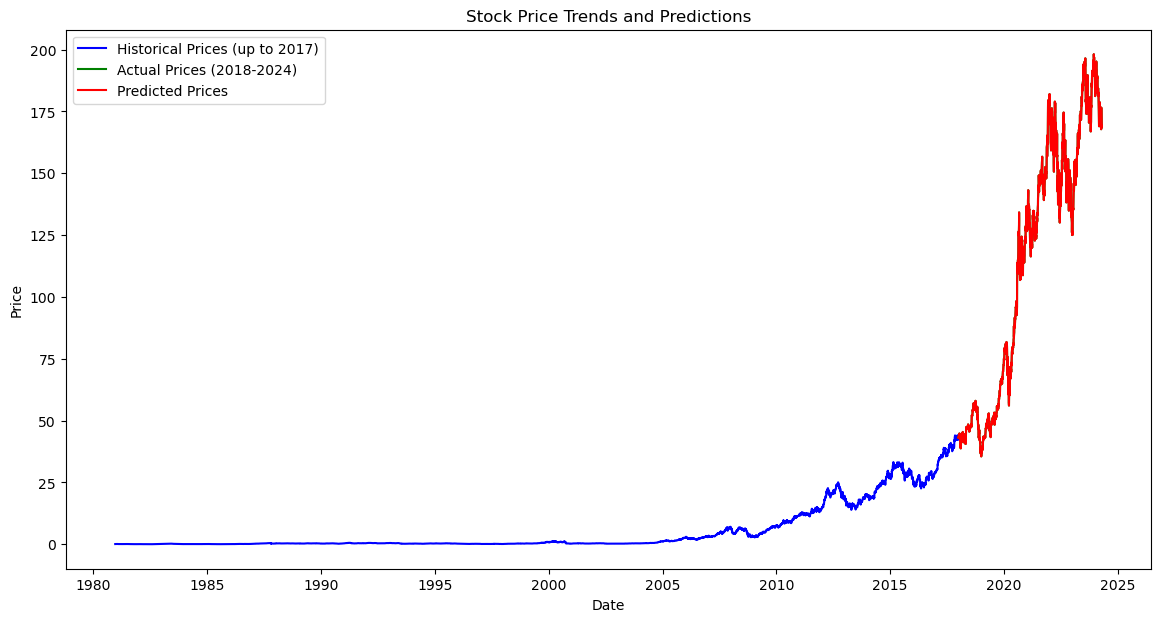

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def preprocess_data(file_path, end_date=None):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    if end_date:
        data = data[data['Date'] <= pd.to_datetime(end_date)]
    data['Prev Close'] = data['Close'].shift(1)
    data['Price Change'] = (data['Close'] - data['Prev Close']) / data['Prev Close']
    data['Label'] = (data['Price Change'] > 0).astype(int)
    data.dropna(inplace=True)
    return data

directory_path = './new_data/tech'

model = LogisticRegression()
scaler = StandardScaler()
test_accs = []
cv_accs = []

for file in os.listdir(directory_path):
    if file.endswith('.csv'):
        file_path = os.path.join(directory_path, file)
        data = preprocess_data(file_path, end_date='2017-12-31')
        X = data.drop(['Date', 'Label'], axis=1)
        y = data['Label']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy')
        cv_accs.extend(cv_scores)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        test_acc = accuracy_score(y_test, y_pred)
        test_accs.append(test_acc)


avg_cv_acc = np.mean(cv_accs)
avg_test_acc = np.mean(test_accs)
print(f"Average Cross-Validation Accuracy: {avg_cv_acc:.4f}")
print(f"Average Test Accuracy: {avg_test_acc:.4f}")

testing_filepath = './new_data/tech/AAPL.csv'
testing_data = preprocess_data(testing_filepath)
historical_data = testing_data[testing_data['Date'] <= pd.to_datetime('2017-12-31')]
actual_data = testing_data[testing_data['Date'] >= pd.to_datetime('2018-01-01')]

X_actual = scaler.transform(actual_data.drop(['Date','Label'], axis=1))
predictions = model.predict(X_actual)
acc = accuracy_score(actual_data['Label'], predictions)
print(f"The accuracy of the predicted trend is: {acc:.4f}")

plt.figure(figsize=(14, 7))
plt.plot(historical_data['Date'], historical_data['Close'], label='Historical Prices (up to 2017)', color='blue')
plt.plot(actual_data['Date'], actual_data['Close'], label='Actual Prices (2018-2024)', color='green')
predicted_changes = np.where(predictions > 0, actual_data['Price Change'], -actual_data['Price Change'])
predicted_prices = actual_data['Prev Close'] * (1 + predicted_changes)
plt.plot(actual_data['Date'], predicted_prices, label='Predicted Prices', color='red')

plt.title('Stock Price Trends and Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()